# **IMPORTING DATASET:-**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


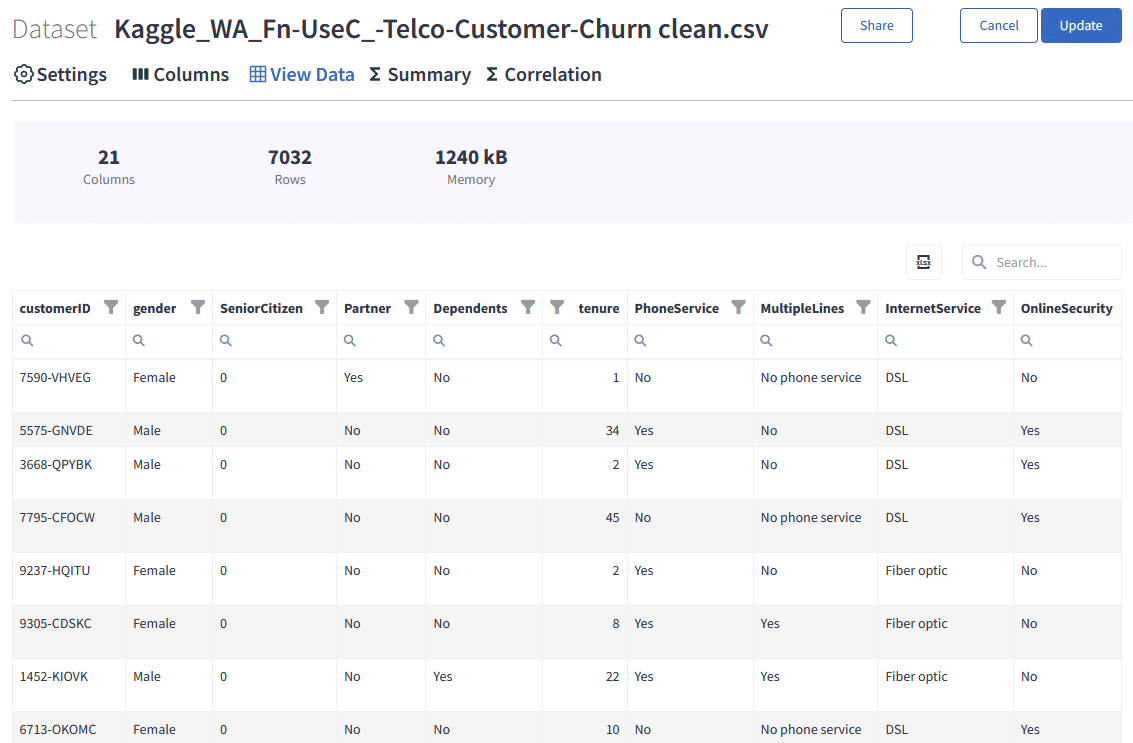

In [4]:
#Telecom dataset.
url = "https://raw.githubusercontent.com/Pradnya1208/Telecom-Customer-Churn-prediction/main/data.csv" #new technoque of uploading any dataset.
df = pd.read_csv(url)
df.head(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [5]:
#all the col, rows
pd.set_option("display.max_columns",None) #reme

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# **Feature Engineering:-**

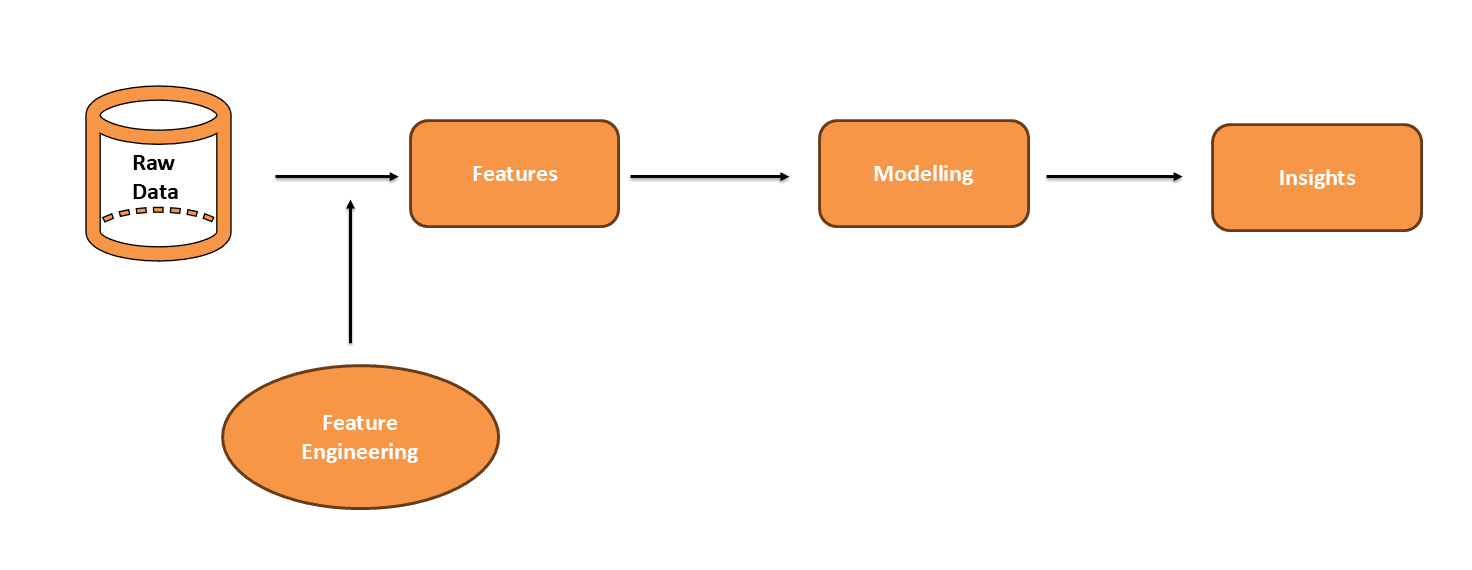

In [7]:
df=df.drop(['customerID'],axis=1) #removing cols.

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [9]:
obj_cols=df.select_dtypes(include='object').columns #collecting object columns
obj_cols

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
for col in obj_cols:
  df[col]=le.fit_transform(df[col])


In [11]:
df #Encoded form of dataset

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


# **Validation techniques:-**

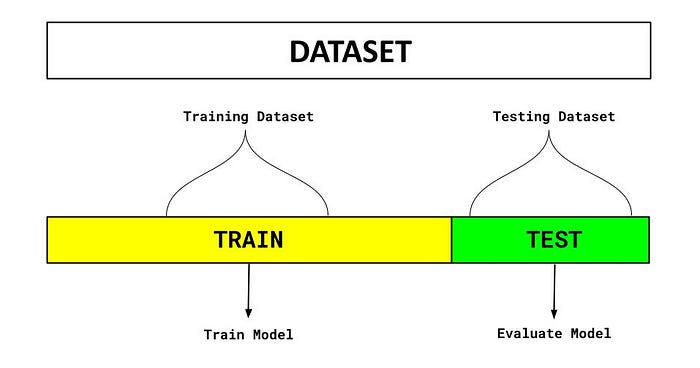

In [12]:
x=df.iloc[:,:-1]
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660


In [13]:
y=df['Churn']
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [14]:
y.value_counts() #cheking for imbalance data

,count
Churn,
0,5174
1,1869


In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,random_state=42)

In [16]:
x_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6661,0,0,1,1,72,0,1,0,0,2,0,2,2,2,2,0,1,53.65,3249
4811,0,0,0,0,4,1,0,0,0,0,0,0,0,0,0,1,3,46.00,1530
2193,1,0,0,1,56,1,0,2,1,1,1,1,1,1,1,1,3,21.20,437
1904,1,0,0,0,56,1,2,1,0,2,0,2,0,2,0,1,2,94.45,4314
6667,0,0,0,0,9,1,0,1,0,0,0,0,0,2,0,1,2,79.55,5635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4250,1,0,0,0,63,1,2,1,2,2,2,2,2,0,1,0,1,104.50,5262
1488,1,0,0,0,1,1,0,0,2,0,0,0,0,0,0,0,3,51.25,4302
6303,0,0,1,0,71,1,2,1,0,2,2,2,2,2,2,0,2,109.25,5872
2710,0,0,1,0,24,1,0,2,1,1,1,1,1,1,1,0,1,20.40,4072


In [17]:
x_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5909,0,0,0,0,52,1,2,1,0,2,0,0,0,0,1,1,3,80.20,3651
3670,0,0,1,1,33,1,2,2,1,1,1,1,1,1,0,0,0,24.25,6166
6220,1,0,1,1,10,0,1,0,2,2,2,2,0,2,2,0,1,53.70,4362
5905,1,0,0,0,1,1,0,1,0,2,0,0,0,2,0,1,2,85.00,6206
6435,1,0,1,1,52,0,1,0,0,2,2,2,2,0,2,0,3,50.20,2212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,1,1,1,1,35,1,0,0,0,2,0,2,2,2,0,1,2,76.05,2386
1607,1,1,1,0,13,1,0,1,0,2,0,2,0,2,0,1,0,89.05,314
6808,1,0,0,0,39,1,0,1,2,0,2,0,2,2,2,1,2,100.45,3261
2962,0,0,1,1,3,0,1,0,0,0,0,2,0,0,0,1,3,31.00,6441


In [18]:
y_train

,Churn
6661,0
4811,1
2193,0
1904,1
6667,1
...,...
4250,0
1488,0
6303,0
2710,0


In [19]:
y_test

,Churn
5909,0
3670,0
6220,0
5905,0
6435,0
...,...
476,0
1607,1
6808,0
2962,1


# **Feature Scaling:-**

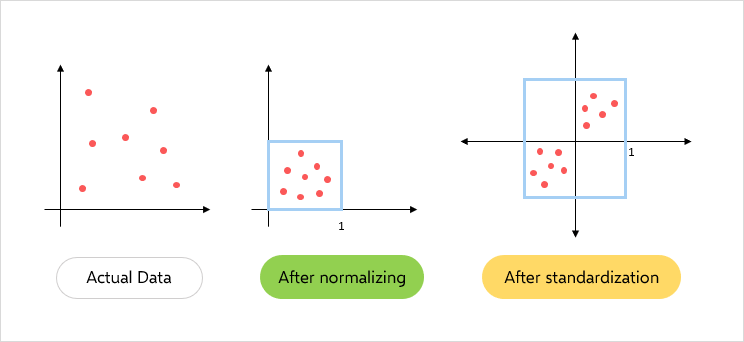

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [21]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [22]:
x_train

array([[-1.00607677, -0.43977565,  1.04176503, ..., -0.5333469 ,
        -0.37146069, -0.0252063 ],
       [-1.00607677, -0.43977565, -0.95990936, ...,  1.33540156,
        -0.62503158, -0.93413051],
       [ 0.99395993, -0.43977565, -0.95990936, ...,  1.33540156,
        -1.44706533, -1.51205615],
       ...,
       [-1.00607677, -0.43977565,  1.04176503, ...,  0.40102733,
         1.47148594,  1.36170947],
       [-1.00607677, -0.43977565,  1.04176503, ..., -0.5333469 ,
        -1.47358254,  0.40995637],
       [ 0.99395993, -0.43977565, -0.95990936, ...,  1.33540156,
        -1.46529591, -1.6505891 ]])

In [23]:
x_test

array([[-1.02007657, -0.44033885, -0.98702343, ...,  1.33335528,
         0.52688871,  0.27180754],
       [-1.02007657, -0.44033885,  1.01314718, ..., -1.49333651,
        -1.34802829,  1.61267702],
       [ 0.98031857, -0.44033885,  1.01314718, ..., -0.55110591,
        -0.36114168,  0.65087641],
       ...,
       [ 0.98031857, -0.44033885, -0.98702343, ...,  0.39112468,
         1.20547797,  0.06387947],
       [-1.02007657, -0.44033885,  1.01314718, ...,  1.33335528,
        -1.12183187,  1.75929297],
       [ 0.98031857, -0.44033885,  1.01314718, ...,  0.39112468,
        -0.62252422, -1.3542966 ]])

# **Dimentionality Reduction Technique:-**

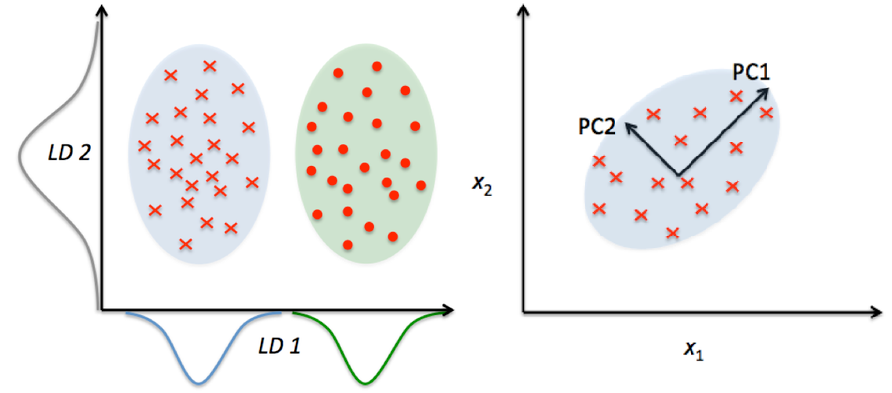

In [24]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.90)

In [25]:
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)

In [26]:
x_train_pca.shape

(5282, 15)

In [27]:
x_train_pca

array([[ 2.51544079e+00, -1.44921869e+00, -2.42779992e+00, ...,
        -1.91738709e+00,  1.62706580e+00,  2.03141275e-01],
       [-3.51878909e+00,  2.50098642e-01, -5.94526751e-01, ...,
         5.76218596e-01,  2.48425567e-02,  1.75518503e-01],
       [-3.39915874e-01, -2.04675283e+00,  1.27241120e+00, ...,
         9.91659180e-01, -1.23793517e-01, -1.23937314e-02],
       ...,
       [ 3.59183586e+00,  4.91801099e-01,  8.32521910e-01, ...,
         1.68875470e-02,  1.40263730e+00,  1.32239516e-01],
       [-2.18781111e-03, -1.91909462e+00,  1.29150540e+00, ...,
        -3.06810404e-01, -2.21620029e-02,  1.15013859e-01],
       [-2.04181081e+00, -1.88565471e+00,  1.70314228e+00, ...,
        -2.14214080e-01, -2.84794207e-01, -6.34619460e-02]])

In [28]:
x_test_pca

array([[-0.74103617,  0.93108625, -0.12222047, ...,  1.09680806,
         0.48920448,  0.10011279],
       [ 0.93873603, -1.23450085,  0.85444979, ..., -0.34593107,
         0.27695668, -0.30003819],
       [ 2.0792813 , -2.29633087, -2.88956507, ..., -0.2657228 ,
        -0.2326964 ,  1.21680609],
       ...,
       [ 1.18159255,  0.54953569,  1.00104294, ...,  0.64587248,
        -1.99790955, -0.01467248],
       [-1.6795331 , -0.76402708, -2.98913738, ...,  0.8917185 ,
         2.07619783, -0.08912719],
       [-1.05486244,  0.8260444 , -2.14458464, ..., -0.68579613,
        -0.28988564,  0.27793654]])

# **ANN Model Building:-**

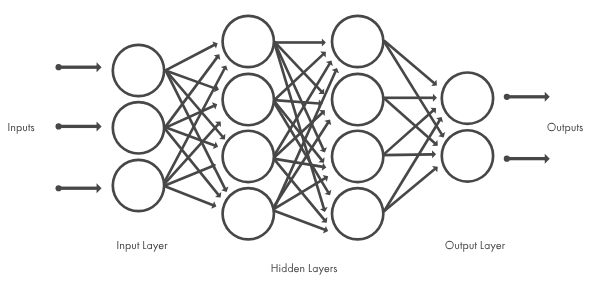

In [29]:
!pip install tensorflow

In [30]:
from tensorflow.keras.models import Sequential #ann frame-work
from tensorflow.keras.layers import Dense #different layers
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU #activation function
from tensorflow.keras.layers import Dropout #layer to deactivating nodes

In [31]:
classifier=Sequential()

In [32]:
classifier.add(Dense(units=15,activation='relu')) #input layer
classifier.add(Dense(units=32,activation='relu')) #hidden layer
classifier.add(Dropout(0.2)) #droup out layer
classifier.add(Dense(units=16,activation='relu')) #hidden layer
classifier.add(Dropout(0.2)) #droup out layer
classifier.add(Dense(units=8,activation='relu')) #hidden layer
classifier.add(Dropout(0.2)) #droup out layer
classifier.add(Dense(units=1,activation='sigmoid')) #output layer

In [33]:
from tensorflow.keras.optimizers import Adam
optimizer=Adam(learning_rate = 0.01 )
classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [44]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 15)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,277 (16.71 KB)

 Trainable params: 1,425 (5.57 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,852 (11.14 KB)

In [35]:
#Early stopping:
from tensorflow import keras
# early stopping condition
early_stopping=keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=10,
)

In [36]:
history=classifier.fit(x_train_pca,y_train,batch_size=10,epochs=50,verbose=2,callbacks=[early_stopping],validation_split=0.2)

Epoch 1/50
423/423 - 7s - 16ms/step - accuracy: 0.7479 - loss: 0.4947 - val_accuracy: 0.7398 - val_loss: 0.4668
Epoch 2/50
423/423 - 2s - 5ms/step - accuracy: 0.7621 - loss: 0.4659 - val_accuracy: 0.7843 - val_loss: 0.4367
Epoch 3/50
423/423 - 3s - 8ms/step - accuracy: 0.7617 - loss: 0.4664 - val_accuracy: 0.7833 - val_loss: 0.4474
Epoch 4/50
423/423 - 5s - 11ms/step - accuracy: 0.7716 - loss: 0.4594 - val_accuracy: 0.7833 - val_loss: 0.4401
Epoch 5/50
423/423 - 2s - 5ms/step - accuracy: 0.7730 - loss: 0.4517 - val_accuracy: 0.7786 - val_loss: 0.4363
Epoch 6/50
423/423 - 4s - 8ms/step - accuracy: 0.7728 - loss: 0.4539 - val_accuracy: 0.7796 - val_loss: 0.4390
Epoch 7/50
423/423 - 4s - 9ms/step - accuracy: 0.7636 - loss: 0.4652 - val_accuracy: 0.7966 - val_loss: 0.4398
Epoch 8/50
423/423 - 2s - 4ms/step - accuracy: 0.7673 - loss: 0.4533 - val_accuracy: 0.7559 - val_loss: 0.4572
Epoch 9/50
423/423 - 2s - 5ms/step - accuracy: 0.7652 - loss: 0.4596 - val_accuracy: 0.7919 - val_loss: 0.4420

In [37]:
y_pred=classifier.predict(x_test_pca) #prediction
y_pred=(y_pred > 0.5 )

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [38]:
#accuracy check:
from sklearn.metrics import  *

In [39]:
confusion_matrix(y_test,y_pred)


array([[1293,    1],
       [ 457,   10]])

In [40]:
roc_auc_score(y_test,y_pred)*100

51.032023935210766

# we are getting very low acuracy.so we need to chance the process of training

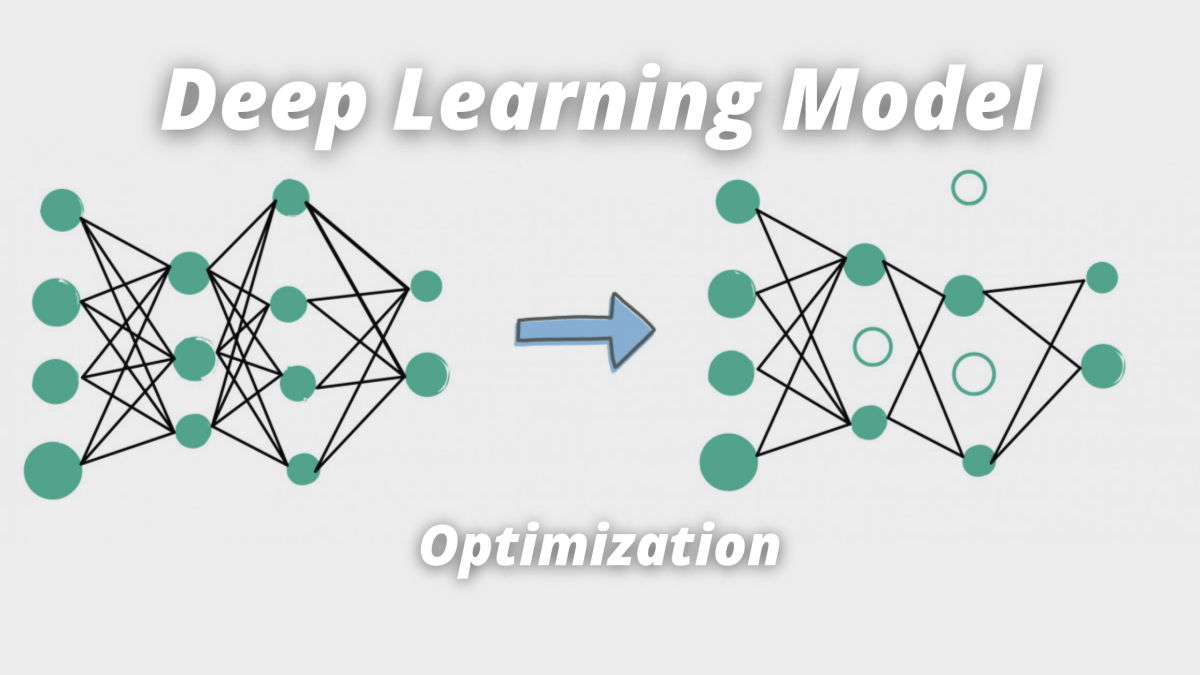

What if we apply Randomizedsearch cv  to find out the optimal values of nodes and leyars?

In [41]:
#!pip install -U scikeras scikit-learn



In [42]:
import scikeras
import sklearn

print("scikeras version:", scikeras.__version__)
print("scikit-learn version:", sklearn.__version__)

scikeras version: 0.13.0
scikit-learn version: 1.7.0


In [43]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from sklearn.metrics import confusion_matrix, roc_auc_score
import numpy as np

# Define model function
def create_model(hidden_layer_1_nodes=32, hidden_layer_2_nodes=16):
    model = Sequential()
    model.add(Dense(units=15, activation='relu', input_shape=(x_train_pca.shape[1],)))
    model.add(Dense(units=hidden_layer_1_nodes, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=hidden_layer_2_nodes, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap with KerasClassifier
model = KerasClassifier(model=create_model, verbose=0)

# Hyperparameter distribution
param_dist = {
    'model__hidden_layer_1_nodes': [32, 64, 128, 256],
    'model__hidden_layer_2_nodes': [16, 32, 64, 128],
    'epochs': [50, 100],
    'batch_size': [32, 64]
}

# Early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=5, start_from_epoch=10, verbose=1
)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,
    scoring='accuracy',
    cv=3,
    verbose=1,
    random_state=42
)

# Fit with callbacks
fit_params = {"callbacks": [early_stopping]}
random_result = random_search.fit(x_train_pca, y_train, **fit_params)

# Best results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))

# Evaluate
best_model = random_result.best_estimator_
test_loss, test_accuracy = best_model.model_.evaluate(x_test_pca, y_test, verbose=0)
print(f"Test Accuracy of Best Model: {test_accuracy}")

# Predict and score
y_pred_best = best_model.predict(x_test_pca)
y_pred_best = (y_pred_best > 0.5).astype(int)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

print("ROC AUC Score:")
print(roc_auc_score(y_test, y_pred_best) * 100)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

Best: 0.775273 using {'model__hidden_layer_2_nodes': 16, 'model__hidden_layer_1_nodes': 32, 'epochs': 100, 'batch_size': 32}
Test Accuracy of Best Model: 0.7762634754180908
Confusion Matrix:
[[1131  163]
 [ 231  236]]
ROC AUC Score:
68.9693661074503


# **Again generate classifier:-**

In [48]:
classifier2=Sequential()

In [49]:
classifier2.add(Dense(units=15,activation='relu')) #input layer
classifier2.add(Dense(units=32,activation='relu')) #hidden layer
classifier2.add(Dense(units=16,activation='relu')) #hidden layer
classifier2.add(Dense(units=1,activation='sigmoid')) #output layer

In [50]:
classifier2.summary()

Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_133 (Dense)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_134 (Dense)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_135 (Dense)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_136 (Dense)               │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [51]:
from tensorflow.keras.optimizers import Adam
optimizer=Adam(learning_rate = 0.01 )
classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [52]:
history=classifier.fit(x_train_pca,y_train,batch_size=32,epochs=100,verbose=2,callbacks=[early_stopping],validation_split=0.2)

Epoch 1/100
133/133 - 4s - 33ms/step - accuracy: 0.7399 - loss: 0.5064 - val_accuracy: 0.7493 - val_loss: 0.4521
Epoch 2/100
133/133 - 1s - 5ms/step - accuracy: 0.7645 - loss: 0.4564 - val_accuracy: 0.7682 - val_loss: 0.4489
Epoch 3/100
133/133 - 0s - 4ms/step - accuracy: 0.7742 - loss: 0.4423 - val_accuracy: 0.7654 - val_loss: 0.4506
Epoch 4/100
133/133 - 1s - 4ms/step - accuracy: 0.7730 - loss: 0.4370 - val_accuracy: 0.7871 - val_loss: 0.4392
Epoch 5/100
133/133 - 1s - 5ms/step - accuracy: 0.7761 - loss: 0.4374 - val_accuracy: 0.7758 - val_loss: 0.4553
Epoch 6/100
133/133 - 0s - 3ms/step - accuracy: 0.7825 - loss: 0.4323 - val_accuracy: 0.7606 - val_loss: 0.4567
Epoch 7/100
133/133 - 1s - 5ms/step - accuracy: 0.7756 - loss: 0.4348 - val_accuracy: 0.7597 - val_loss: 0.4554
Epoch 8/100
133/133 - 0s - 3ms/step - accuracy: 0.7858 - loss: 0.4265 - val_accuracy: 0.7540 - val_loss: 0.4584
Epoch 9/100
133/133 - 1s - 5ms/step - accuracy: 0.7799 - loss: 0.4278 - val_accuracy: 0.7947 - val_loss

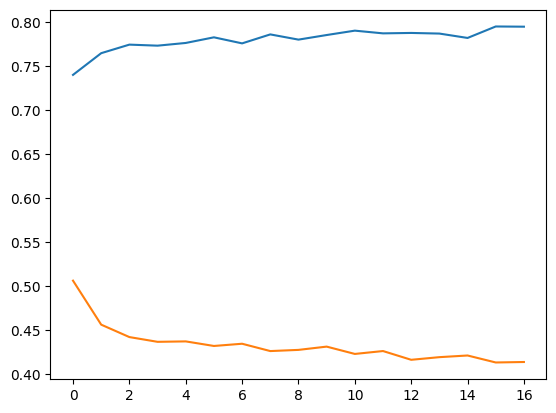

In [53]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])

# **Checking for overfitting:-**

In [54]:
y_pred=classifier2.predict(x_train_pca)
y_pred=(y_pred > 0.5)

166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [55]:
accuracy_score(y_train,y_pred)

0.6308216584627035

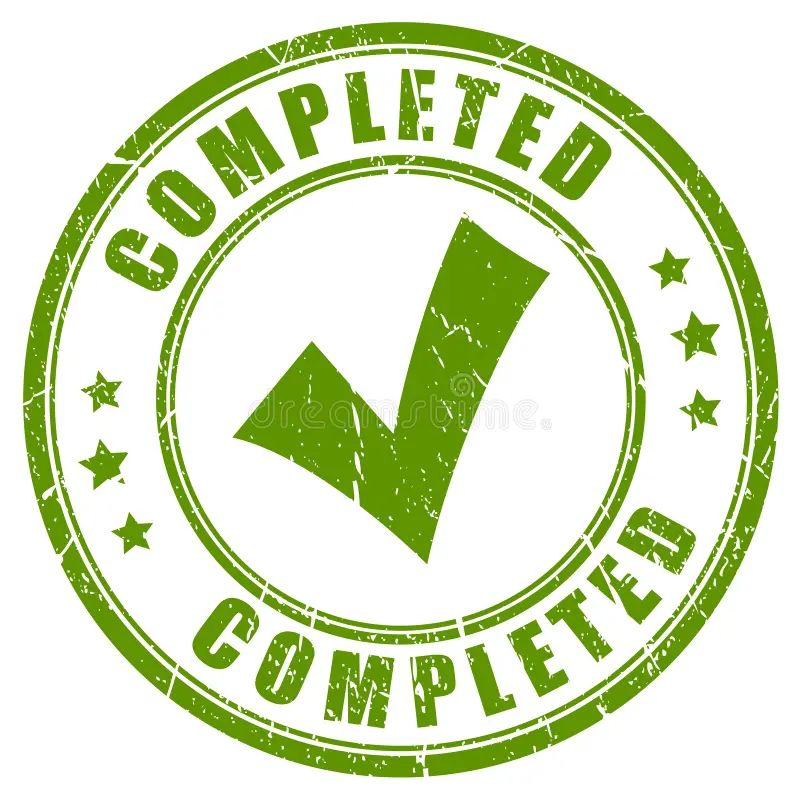